# DS-GA 1018 Probabilistic Time Series Analysis
# Lab 3: ACF and CCF

### Please turn in the code before 09/26/2022 6:00 pm (next Monday). 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".

functions and packages needed

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, vlines_kwargs=kwargs)
    # Depending on your version of statsmodels, you may have to use the following instead:
    #statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, **kwargs)
    return fig

## Part I:  Autocorrelation Function

### A) implement ACF
Do your own implementation of the ACF function. Your implementation will be checked against the true empirical ACF.

In [3]:
def acf_impl(x, nlags):
    """
    TODO
    @param x: a 1-d numpy array (data)
    @param nlags: an integer indicating how far back to compute the ACF
    @return a 1-d numpy array with (nlags+1) elements. 
            Where the first element denotes the acf at lag = 0 (1.0 by definition).
    """
    #TODO: replace the template code with your code here. This part will be graded.
    return np.zeros(nlags+1)

### B) ACF of White Noise 

$$w_t \sim N(0, \sigma^2)$$

1. Set $\sigma$ = 1, sample n = 500 points from the process above
2. Plot the white noise
3. Plot the sample ACF up to lag = 20.
4. Compare sample ACF with analytical ACF.
5. Compare your sample ACF with true sample ACF.
5. What trend/observation can you find in the ACF plot?
6. Change n to 50, compare the new ACF plot (n=50) to the old ACF plot (n=500). What causes the difference?

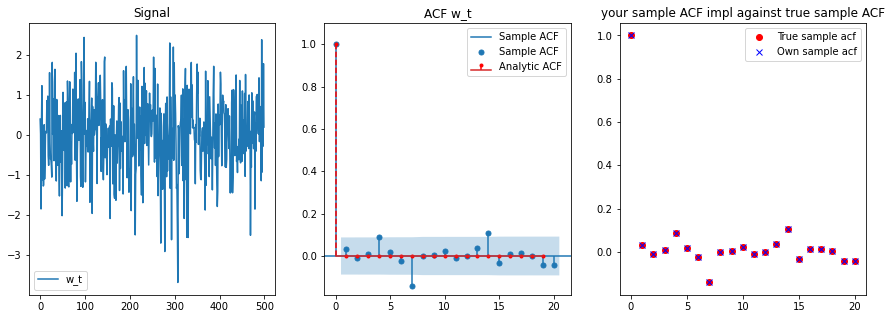

In [4]:
## 1.
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n)

# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

## 2.
# plot white noise
ax1.plot(w_t, label="w_t")
ax1.set_title("Signal")
ax1.legend()

## 3.
# calculate acf
acf_val = acf(x=w_t, nlags=lag)
## 4.
acf_analytic = np.zeros(lag)
acf_analytic[0] = std**2
plot_acf(x=w_t, lags=lag, title="ACF w_t", ax=ax2, label="Sample ACF")
ax2.stem(acf_analytic, markerfmt='r.', linefmt='r--', label="Analytic ACF")
ax2.set_ylim([1.3*min(acf_val), 1.1*(std**2)])
ax2.legend()

## 5.
# your implementation:
acf_val_impl = acf_impl(x=w_t, nlags=lag)
ax3.plot(acf_val, 'or', label='True sample acf')
ax3.plot(acf_val_impl, 'xb', label='Own sample acf')
ax3.legend();
ax3.set_title('your sample ACF impl against true sample ACF');

### C) ACF of Moving Average 

$$v_t = \frac{1}{3}(w_{t}+ w_{t-1}+ w_{t-2})$$

1. Sample n+2 white noise from N(0,1)
2. Add code to compute the moving average $v_t$.
3. Plot both $w_t$ and $v_t$ and compare the two time series.
4. Derive the analytical ACF
4. Compare sample ACF up to lag 20 with the analytical ACF.
5. Compare your sample ACF with true sample ACF.

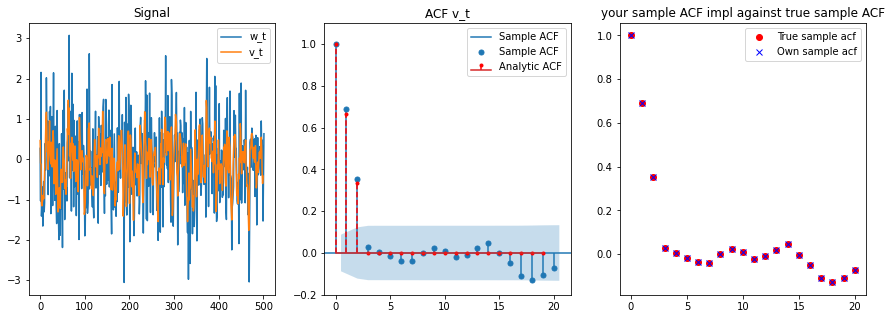

In [12]:
## 1.
n = 500
mean = 0
std = 1 
lag = 20

# create white noise
w_t = np.random.normal(mean, std, size=n+2)
# create moving average
## 2.
# TODO: replace the template code with your code here. This part will be graded.
v_t = np.zeros(len(w_t)) 


# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

## 3.
# plot white noise
ax1.plot(w_t, label="w_t")
# plot moving average
ax1.plot(v_t, label="v_t")
ax1.set_title("Signal")
ax1.legend()

## 4.
# TODO: derive analytical ACF. This part will be graded.
acf_analytic = np.zeros(lag)
acf_analytic[0] = std**2

## 5.
# calculate acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag, title="ACF v_t", ax=ax2, label="Sample ACF")
ax2.stem(acf_analytic, markerfmt='r.', linefmt='r--', label="Analytic ACF")
ax2.set_ylim([-0.2, 1.1*(std**2)])
ax2.legend()

## 6.
# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
ax3.plot(acf_val, 'or', label='True sample acf')
ax3.plot(acf_val_impl, 'xb', label='Own sample acf')
ax3.legend();
ax3.set_title('your sample ACF impl against true sample ACF');

### D) ACF of signal in noise 

$$v_t = 2 cos(\frac{2\pi t}{50} + 0.6\pi) + w_t$$

1. Sample white noise of length n from $N(0,1)$
2. Add code to compute $v_t$.
3. Plot both $w_t$ and $v_t$. Compare the two plots.
4. Plot the sample ACF of $v_t$. What's the pattern? What causes the observed pattern?

[Optional]: derive and compare to the analytical ACF (hint, use cosine trig identity)

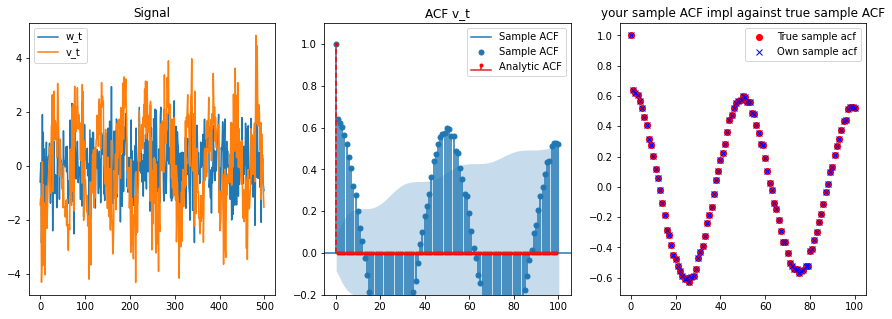

In [13]:
## 1.
n = 500
mean = 0
std = 1 
lag = 100

# create white noise
w_t = np.random.normal(mean, std, size=n)
# create moving average
## 2.
# TODO: replace the template code with your code here. This part will be graded.
v_t = np.zeros(len(w_t)) 

# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

## 3.
# plot white noise
ax1.plot(w_t, label="w_t")
# plot moving average
ax1.plot(v_t, label="v_t")
ax1.set_title("Signal")
ax1.legend()

# OPTIONAL TODO: derive analytical ACF.  This part will NOT be graded.
acf_analytic = np.zeros(lag)
acf_analytic[0] = std**2
# calculate acf
acf_val = acf(x=v_t, nlags=lag)
plot_acf(x=v_t, lags=lag, title="ACF v_t", ax=ax2, label="Sample ACF")
ax2.stem(acf_analytic, markerfmt='r.', linefmt='r--', label="Analytic ACF")
ax2.set_ylim([-0.2, 1.1*(std**2)])
ax2.legend()

## 4.
# your implementation:
acf_val_impl = acf_impl(x=v_t, nlags=lag)
ax3.plot(acf_val, 'or', label='True sample acf')
ax3.plot(acf_val_impl, 'xb', label='Own sample acf')
ax3.legend();
ax3.set_title('your sample ACF impl against true sample ACF');

## Part II:  Cross-correlation Function

### A) CCF of signal with noise
#### Synthetic Data

$$x_t \sim N(0, \sigma_x^2) $$

$$ y_t = 2x_{t-5} + w_t$$

$$w_t \sim N(0, \sigma_x^2)$$

- In this example, we created two processes with a lag of 5.
- Plot both samples and verify the lag.
- Plot the empirical ACF for both samples.
- Plot the empirical CCF. What information can you conclude from the CCF plot?

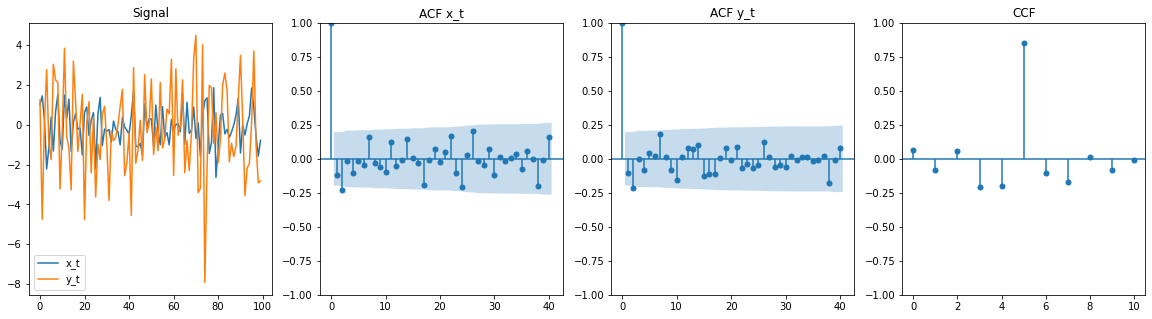

In [14]:
# Cross-correlation synthetic Example
n = 100
mean = 0
std = 1 
lag=40
true_h = 5

x_t = np.random.normal(mean, std, size=n+5)
# TODO: replace the template code with your code here. This part will be graded.
y_t = np.zeros(n)

x_t = x_t[:n]

# create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# plot the original data
ax1.plot(x_t, label="x_t")
ax1.plot(y_t, label="y_t")
ax1.legend()
ax1.set_title("Signal")

# plot acf
plot_acf(x=x_t, lags=lag, title="ACF x_t", ax=ax2)
plot_acf(x=y_t, lags=lag, title="ACF y_t", ax=ax3)

# plot ccf
ccf_val = ccf(y_t, x_t)
plot_ccf(x_t, y_t, title="CCF", lags=10, ax=ax4)
plt.show()

### B) CCF of data
#### Southern Oscillation Index (SOI) v.s. Recruitment (Rec)

- Replicate the procedure in the previous section.
- What information can you tell from the CCF plot.
- In this example, our procedure is actually flawed. Unlike the previous example, we can not tell if the cross-correlation estimate is significantly different from zero by looking at the CCF. Why is that? What can we do to address this issue?

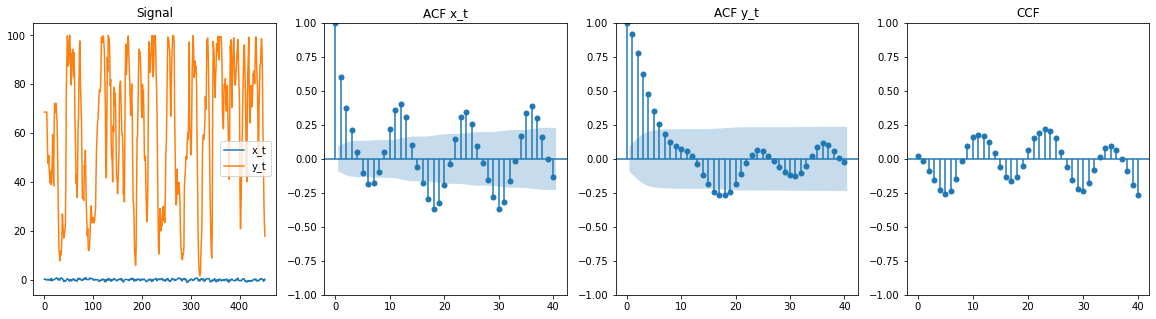

In [17]:
soi = np.array(pd.read_csv("soi.csv")["x"])
rec = np.array(pd.read_csv("rec.csv")["x"])
#TODO: This part will be graded.
# plot data
# plot acf
# plot ccf


## Part III
### Moving Average

### A)

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Is $x_t$ same as white noise $w_t$?
Think about ACF.

Then use code below to assess and verify your guess.

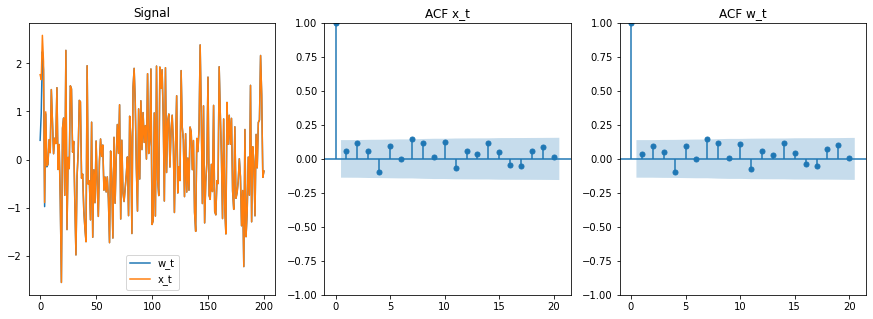

In [110]:
n = 200
mean = 0
std = 1 
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
# plot x_t & w_t
ax1.plot(w_t, label="w_t")
ax1.plot(x_t, label="x_t")
ax1.legend()
ax1.set_title("Signal")

# acf 
plot_acf(x=x_t, lags=lag, title="ACF x_t", ax=ax2)
plot_acf(x=w_t, lags=lag, title="ACF w_t", ax=ax3)
plt.show()

### B)

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same? Think about ACF.

Then use code below to assess and verify your guess.

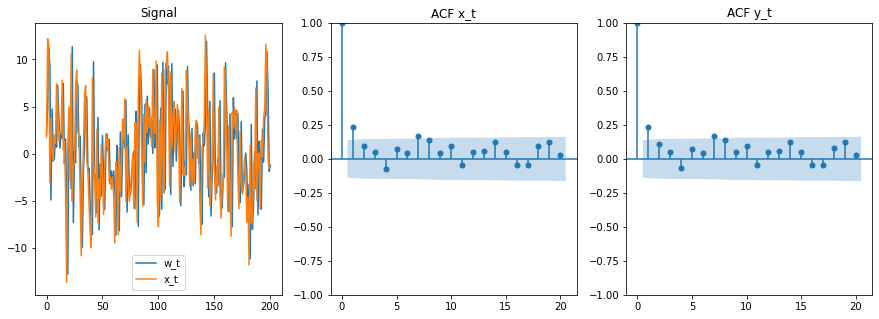

In [112]:
n = 200
mean = 0
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
# plot x_t & y_t
ax1.plot(w_t, label="w_t")
ax1.plot(x_t, label="x_t")
ax1.legend()
ax1.set_title("Signal")

# acf
plot_acf(x=x_t, lags=lag, title="ACF x_t", ax=ax2)
plot_acf(x=y_t, lags=lag, title="ACF y_t", ax=ax3)
plt.show()

### Please turn in the code before 09/26/2022 6:00 pm (next Monday). 

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. Everything that will be graded is indicated by the "TODO".